<a href="https://colab.research.google.com/github/bdipesh3045/356-Days-Of-Data-Science/blob/main/Gradient_Descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
# Load our data set
import numpy as np
x_train = np.array([1.0, 2.0])   #features
y_train = np.array([300.0, 500.0])   #target value

In [31]:
def cost(x,y,w,b):
  leng=x.shape[0]
  cos=0
  for i in range(leng):
    d_c=w*x[i]+b
    cos=cos+(d_c-y[i])**2
  cos=1/(2*leng)*cos
  return cos

In [32]:
# Steps to folow calculate partial derivative and avg it out
def compute_gradient(x,y,w,b):
  total_w=0
  total_b=0
  leng=x.shape[0]
  for i in range(leng):
    d_eq=w*x[i]+b
    d_w=(d_eq-y[i])*x[i]
    d_b=(d_eq-y[i])
    total_w+=d_w
    total_b+=d_b
  total_w=1/leng*(total_w)
  total_b=1/leng*(total_b)
  return total_w,total_b

In [33]:
data=[]
w_chan=[]
costy=[]
b_chan=[]
def find(x,y,steps,learn):
  b_in=0
  w_in=0
  val=1
  for i in range(steps):
    dw,db=compute_gradient(x,y,w_in,b_in)
    b_in=b_in-learn*db
    w_in=w_in-learn*dw
    if i % 100 == 0:
      w_chan.append(w_in)
      b_chan.append(b_in)
      cost_value=cost(x,y,w=w_in,b=b_in)
      data.append(val)
      val+=1
      costy.append(cost_value)
      print(cost_value)

      # print(b_in,w_in)
  return b_in,w_in



In [34]:
steps=10000
w_final,b_final=find(x=x_train,y=y_train,steps=steps,learn=0.01)
print(f"(w,b) found by gradient descent: ({w_final:8.4f},{b_final:8.4f})")

79274.8125
86.84970508329027
11.038223294493996
9.479334741089724
8.191983243496715
7.079510310868737
6.118111466142633
5.287270767157324
4.569258392878347
3.948752235383136
3.4125109319154174
2.949091299295567
2.548604140792952
2.202503214470976
1.9034028596711572
1.6449203898549272
1.4215398885278132
1.2284945017028241
1.0616647150697145
0.9174904451438306
0.7928950684538176
0.6852197675800903
0.5921667930134331
0.5117504300645481
0.4422546244758681
0.3821963624840068
0.33029402387623996
0.28544003270810303
0.24667722205878423
0.21317840845702343
0.1842287401041018
0.15921044221131833
0.13758963392355794
0.1189049355072536
0.1027576226842888
0.08880311800919871
0.07674363771905501
0.06632183714251148
0.05731531906346955
0.049531887849966594
0.04280544807338754
0.03699246009589656
0.03196887698968801
0.027627497423315734
0.02387567802651798
0.020633356416315897
0.017831342696523346
0.01540984297200712
0.013317183369942085
0.011508707339256798
0.0099458226969803
0.008595178085934518
0.

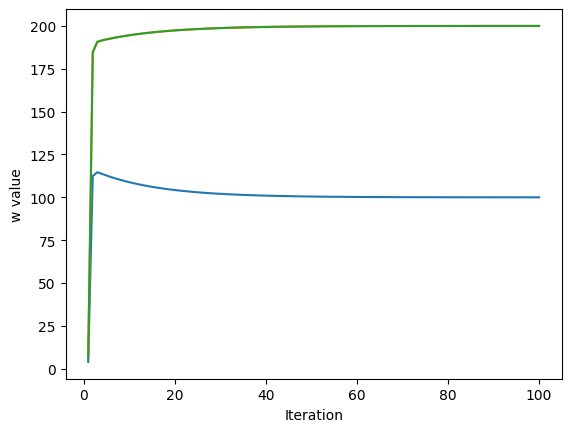

In [35]:
import matplotlib.pyplot as plt
plt.plot(data,b_chan)
plt.xlabel("Iteration")
plt.ylabel("w value")
plt.plot(data,w_chan)
plt.plot(data,w_chan)
plt.show()

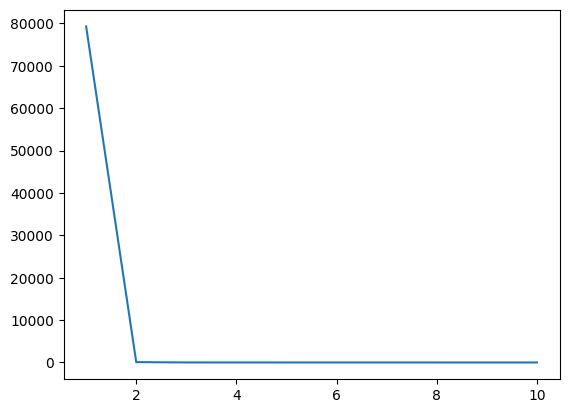

In [36]:
plt.plot(data[:10],costy[:10])

In [37]:
import numpy as np
import pandas as pd

In [87]:
url="https://raw.githubusercontent.com/bdipesh3045/CSV/refs/heads/main/multiple.csv"
df=pd.read_csv(url)
df.head()

,Hours_Studied,Practice_Problems,Sleep_Hours,Test_Score
0,4.370861,5.471438,7.210158,60.932231
1,9.556429,14.546156,4.420700,75.327686
2,7.587945,9.715340,4.808144,78.168512
3,6.387926,12.628560,8.492771,84.652694
4,2.404168,18.613497,7.032145,58.753652


In [39]:
df.head()
x=df[['Hours_Studied','Practice_Problems','Sleep_Hours']].to_numpy()
y=df['Test_Score'].to_numpy()

In [40]:
def cr(x):
  arr=[]
  for i in range(0,len(x.columns)):
    arr.append(0)
  return arr


In [41]:


def compute_gradient(x,y,w,b):
  total_w=0
  total_b=0
  leng=x.shape[0]
  for i in range(leng):

    # This steps uses vectorization to make the model wx+w2x+w3x+b based on the valuse using vectorization
    y_pred=x[i].dot(w)+b
    # This calculates error
    error=y_pred-y[i]
    dw=x[i].T.dot(error)
    dj=np.sum(error)
    total_w+=dw
    total_b+=dj
  total_b=1/leng*total_b
  total_w=1/leng*total_w


  return total_w,total_b

# def compute_gradient_vec(X, y, w, b):
#     m = X.shape[0]
#     y_pred = X.dot(w) + b
#     error = y_pred - y
#     dw = X.T.dot(error) / m
#     db = np.sum(error) / m
#     return dw, db


In [42]:
def find(X, y, steps, learn):
    m, n = X.shape
    w_in = np.zeros(n)  # now a vector of zeros (n features)
    b_in = 0.0          # scalar bias

    for i in range(steps):
        dw, db = compute_gradient(X, y, w_in, b_in)
        w_in =w_in -learn * dw   # update all weights at once
        b_in =b_in- learn * db   # update bias
        print(i)

    return w_in, b_in


In [43]:
import numpy as np

# def find(X, y, steps, learn):
#     m, n = X.shape
#     w = np.zeros(n)  # weight vector
#     b = 0.0          # bias

#     for i in range(steps):
#         dw, db = compute_gradient_vec(X, y, w, b)
#         w -= learn * dw
#         b -= learn * db
#         if i % 10 == 0:   # print progress every 10 steps
#             loss = np.mean((X.dot(w) + b - y)**2) / 2
#             print(f"Step {i}, Loss: {loss:.4f}")

#     return w, b

# def compute_gradient_vec(X, y, w, b):
#     m = X.shape[0]
#     y_pred = X.dot(w) + b
#     error = y_pred - y
#     dw = X.T.dot(error) / m
#     db = np.sum(error) / m
#     return dw, db


In [44]:
print(find(X=x,y=y,steps=100000,learn=0.0001))

Streaming output truncated to the last 5000 lines.
95001
95002
95003
95004
95005
95006
95007
95008
95009
95010
95011
95012
95013
95014
95015
95016
95017
95018
95019
95020
95021
95022
95023
95024
95025
95026
95027
95028
95029
95030
95031
95032
95033
95034
95035
95036
95037
95038
95039
95040
95041
95042
95043
95044
95045
95046
95047
95048
95049
95050
95051
95052
95053
95054
95055
95056
95057
95058
95059
95060
95061
95062
95063
95064
95065
95066
95067
95068
95069
95070
95071
95072
95073
95074
95075
95076
95077
95078
95079
95080
95081
95082
95083
95084
95085
95086
95087
95088
95089
95090
95091
95092
95093
95094
95095
95096
95097
95098
95099
95100
95101
95102
95103
95104
95105
95106
95107
95108
95109
95110
95111
95112
95113
95114
95115
95116
95117
95118
95119
95120
95121
95122
95123
95124
95125
95126
95127
95128
95129
95130
95131
95132
95133
95134
95135
95136
95137
95138
95139
95140
95141
95142
95143
95144
95145
95146
95147
95148
95149
95150
95151
95152
95153
95154
95155
95156
95157
95158
9

In [77]:
df.head(7)
df.shape

(100, 4)

In [46]:
w=np.array([3.7, 1.2, 4.3])
b=6.1
x0 = df[['Hours_Studied', 'Practice_Problems', 'Sleep_Hours']].iloc[5].values
print(x0)
y_pred_first = w.dot(x0) + b

print("Predicted Test Score for first row:", y_pred_first)

[2.40395068 8.73938344 4.04598526]
Predicted Test Score for first row: 42.87961426163284


In [ ]:

y=np.array([3.82504837 ,1.36169108,4.71830514 ])
print(y.shape)
b= 1.791376401465915
x0 = df[['Hours_Studied', 'Practice_Problems', 'Sleep_Hours']].iloc[:].values.reshape(3,-1)
x0

In [71]:
x0.shape
y=y.dot(x0)+b

In [72]:
print(y)

[ 67.53138565  70.30333603  79.3585986   99.85880192  72.09127415
  56.44691436  71.57979381  95.94477656  90.68928174  69.42994763
  94.9661044  108.38117722  70.12259453  91.75793781  63.20231175
  63.20735876  50.01417487  83.85801766  73.60221816  90.46191848
  61.51120255 102.31966804 110.85157055 106.46475169  69.19783963
  81.66103304  54.90373983  77.66182485  74.47907886 105.16502708
  56.9852818   53.3708839   83.08188921  85.83928181  55.65926793
 129.69347463  77.26920006  95.6645308   68.06677782  69.83250501
 117.01492147  76.84636607  68.82149141 100.47331083  70.39648158
  46.6371746  101.69463566 114.29246459  56.32380334  85.69962228
 122.24392895  70.13191001  56.99680774  84.076748    64.70364619
  98.72365581 112.69303068  45.13125456  98.80430746 127.09125118
  73.34282247 106.64061804 101.24329053  69.03432393 121.324824
 101.69739314  53.05932031  73.17081135  62.03782792  71.57753942
  48.84830406  58.06856239  63.27441546  79.18627978 111.17118228
  64.0630596

In [80]:
y_pred=np.array(y.reshape(-1))
y_actual=df['Test_Score'].to_numpy()

In [81]:
print(y_pred.shape)
print(y_actual.shape)


(100,)
(100,)


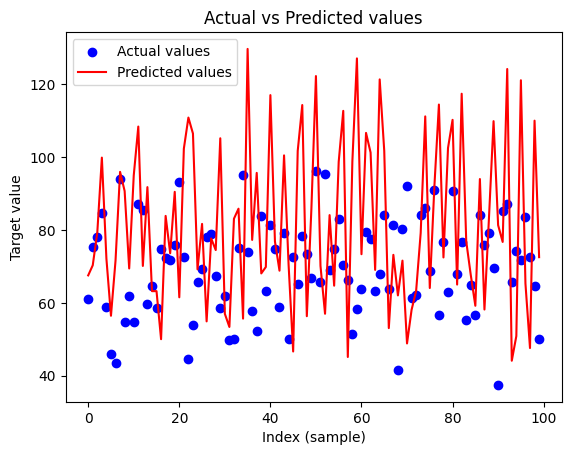

In [83]:
import matplotlib.pyplot as plt
plt.scatter(range(len(y_actual)), y_actual, label="Actual values", color="blue")
plt.plot(range(len(y_pred)), y_pred, label="Predicted values", color="red")  # straight line across index

plt.xlabel("Index (sample)")
plt.ylabel("Target value")
plt.title("Actual vs Predicted values")
plt.legend()
plt.show()
